In [1]:
from lcapy import *
import numpy as np

In [2]:
cct1 = Circuit("""
    Vs  A  B;     down
    W0  A  1;     right=4, i>^=$i_A$
    Ra  1  2 1e3; rotate=225, size=2.4
    Rb  1  3 2e3; rotate=-45, size=2.4
    Rc  2  3 1e3; right
    Rd  2  0 2e3; rotate=-45, size=2.4
    Re  3  0 1e3; rotate=225, size=2.4
    W1  0  B;     left=4, i>^=$i_B$
    #; draw_nodes=false, label_nodes=false
    """)
cct1.draw(options='european resistors')

/home/Kojjan/Documents/School/EITA10 - Elektronik/notebooks/venv/lib/python3.12/site-packages/lcapy/schematic.py:254: SyntaxWarning: invalid escape sequence '\O'
  units_map = {'V': 'V', 'I': 'A', 'R': '$\Omega$',


RuntimeError: circuitikz is not installed

Manual analysis, use KCL in each node, collect terms and arrive at conductance matrix

In [ ]:
G1 = np.array([[1.5, -1.0, -0.5],
               [-1.0, 2.5, -1.0], 
               [-0.5, -1.0, 2.5]])
G1

array([[ 1.5, -1. , -0.5],
       [-1. ,  2.5, -1. ],
       [-0.5, -1. ,  2.5]])

In [ ]:
np.linalg.inv(G1)

array([[1.4       , 0.8       , 0.6       ],
       [0.8       , 0.93333333, 0.53333333],
       [0.6       , 0.53333333, 0.73333333]])

In [ ]:
na = cct1.nodal_analysis()
na.nodal_equations()

⎧                    V₁(t)   V₂(t)   V₃(t)           V₁(t)   V₂(t)   V₃(t)    
⎨1: V₁(t) = Vₛ, 2: - ───── + ───── - ───── = 0, 3: - ───── - ───── + ───── = 0
⎩                     1000    400     1000            2000    1000    400     

⎫
⎬
⎭

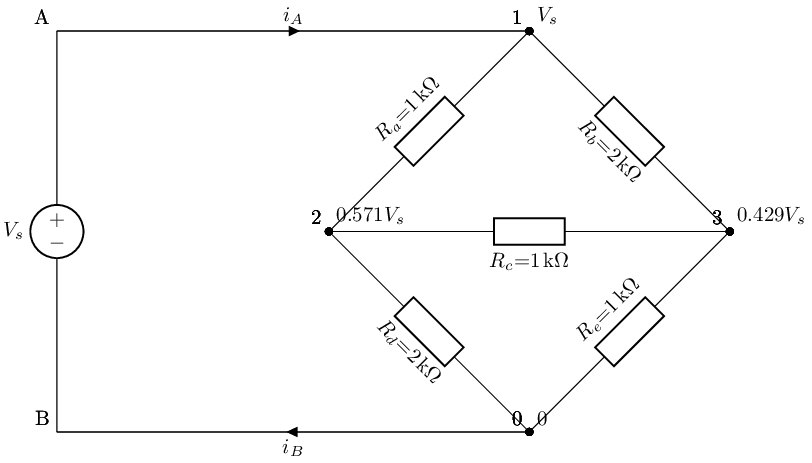

In [ ]:
cct1.annotate_node_voltages(label_voltages=False, show_units=False).draw(draw_nodes='connections',options='european resistors')

In [ ]:
cct1.Vs.i

 Vₛ 
────
1400

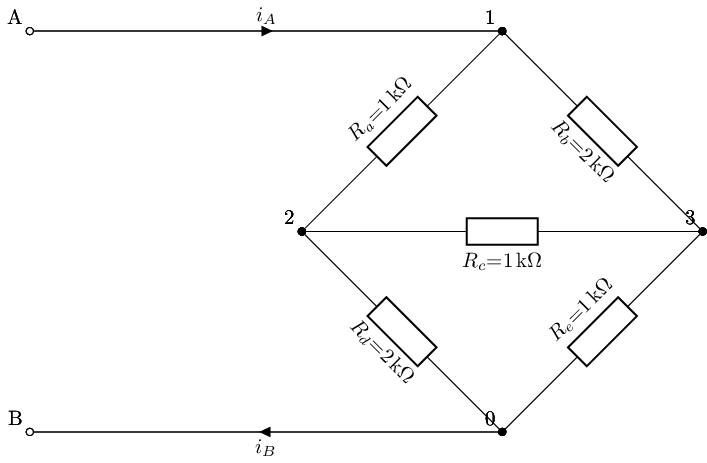

In [ ]:
cct2 = Circuit("""
    P   A  B;     down
    W0  A  1;     right=4, i>^=$i_A$
    Ra  1  2 1e3; rotate=225, size=2.4
    Rb  1  3 2e3; rotate=-45, size=2.4
    Rc  2  3 1e3; right
    Rd  2  0 2e3; rotate=-45, size=2.4
    Re  3  0 1e3; rotate=225, size=2.4
    W1  0  B;     left=4, i>^=$i_B$
    #; draw_nodes=false, label_nodes=false
    """)
cct2.draw(options='european resistors')

In [ ]:
na = cct2.nodal_analysis()
na.nodal_equations()

⎧   3⋅V₁(t)   V₂(t)   V₃(t)           V₁(t)   V₂(t)   V₃(t)           V₁(t)   
⎨1: ─────── - ───── - ───── = 0, 2: - ───── + ───── - ───── = 0, 3: - ───── - 
⎩     2000     1000    2000            1000    400     1000            2000   

V₂(t)   V₃(t)    ⎫
───── + ───── = 0⎬
 1000    400     ⎭

In [ ]:
onep = cct2.oneport(0, 1)
onep.R

1400